,x,y,class
0,1,10,blue
1,1,2,red
2,6,8,red
3,3,4,red
4,9,10,blue
5,10,4,red
6,5,7,blue
7,1,8,blue
8,9,5,red
9,5,4,blue


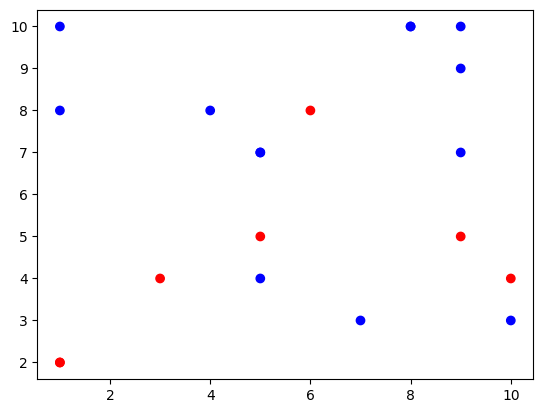

In [1]:
# A3
import pandas as pd
import random
import math as math
import matplotlib.pyplot as plt

def generate_rand_samples(n):
  samples = []

  for i in range(n):
    samples.append(math.ceil(random.random() * 10))

  return samples

def generate_rand_class(n, classes):
  samples = []

  for i in range(n):
    samples.append(classes[math.floor(random.random() * len(classes))])

  return samples


train_data_points = {
    "x": generate_rand_samples(20),
    "y": generate_rand_samples(20),
    "class": generate_rand_class(20, ["blue", "red"])
}

train_data = pd.DataFrame(train_data_points)

display(train_data)

plt.scatter(train_data["x"], train_data["y"], c=train_data["class"])

,x,y,class
0,0.000,0.000,red
1,0.001,0.001,red
2,0.002,0.002,red
3,0.003,0.003,red
4,0.004,0.004,red
...,...,...,...
9995,9.996,9.996,blue
9996,9.997,9.997,blue
9997,9.998,9.998,blue
9998,9.999,9.999,blue


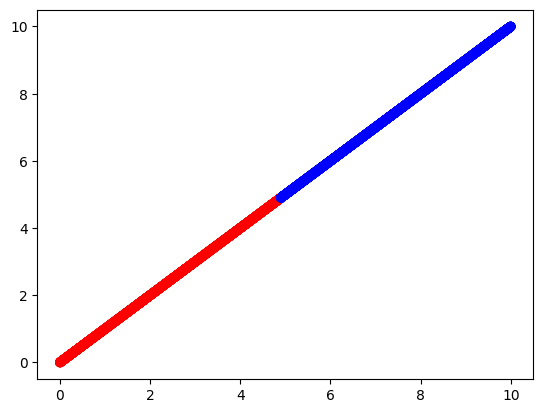

In [2]:
# A4
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

test_data_points = {
    "x": np.linspace(0, 10, 10_000),
    "y": np.linspace(0, 10, 10_000),
}

test_data = pd.DataFrame(test_data_points)

k = 3
model = KNeighborsClassifier(n_neighbors=k)

X_train = train_data[["x", "y"]]
y_train = [0 if c == "blue" else 1 for c in train_data["class"]]

X_test = test_data[["x", "y"]]

model.fit(X_train, y_train)

y_test = model.predict(X_test)
test_data["class"] = ["blue" if c == 0 else "red" for c in y_test]

display(test_data)

plt.scatter(test_data["x"], test_data["y"], c=test_data["class"])

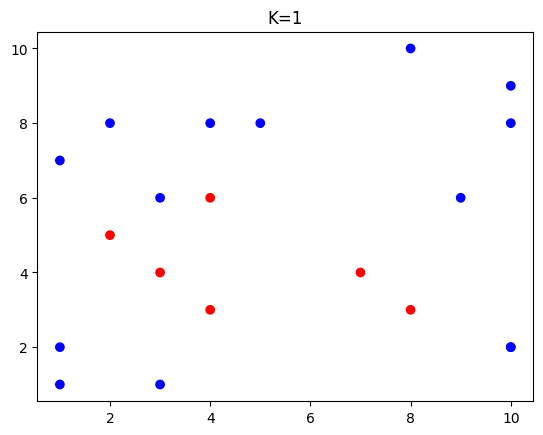

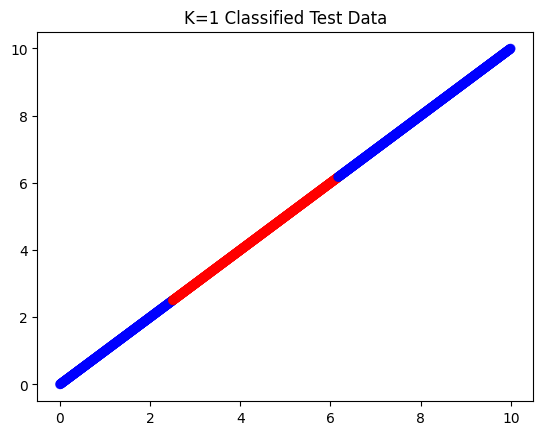

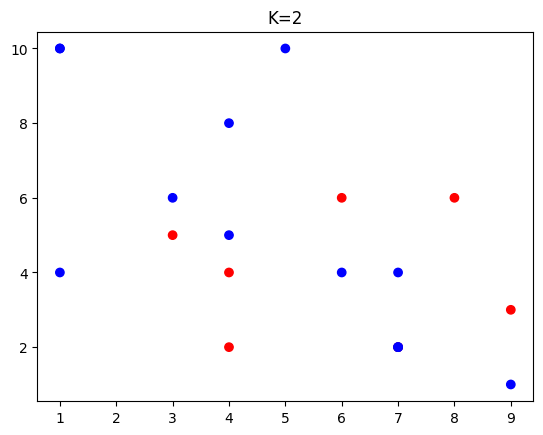

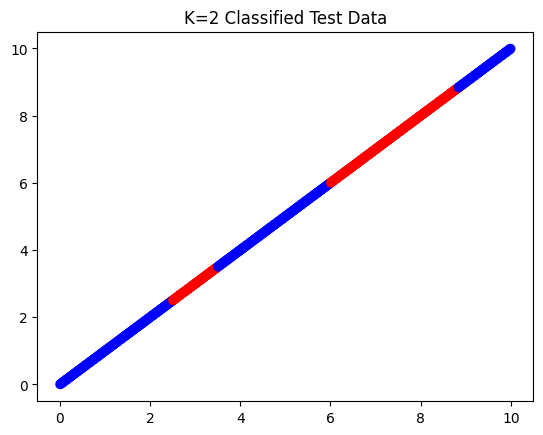

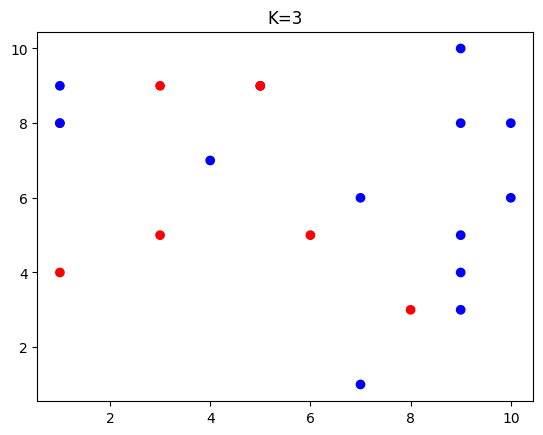

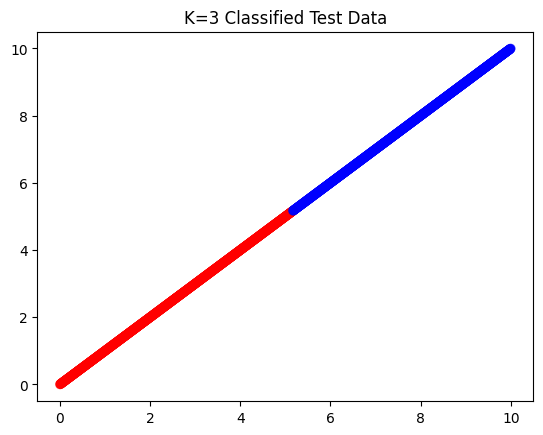

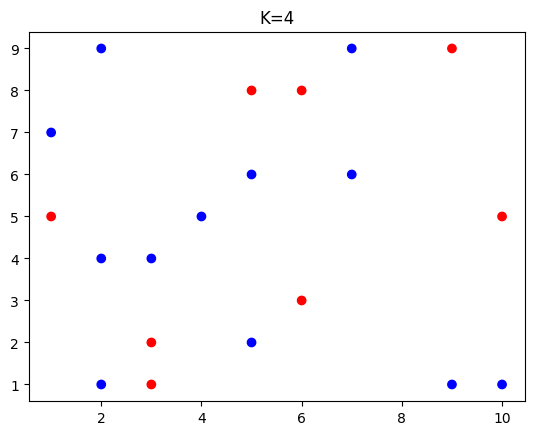

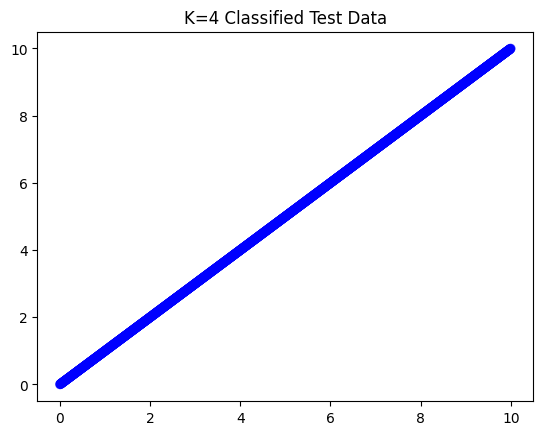

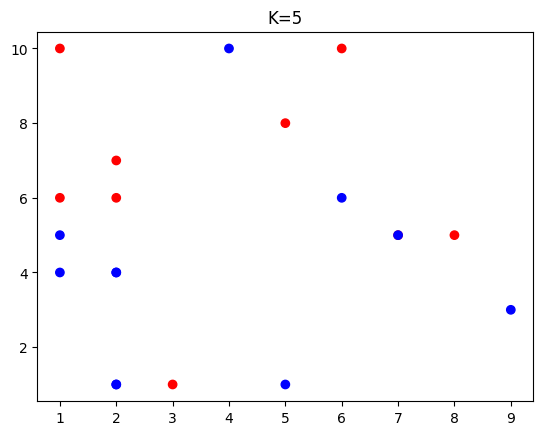

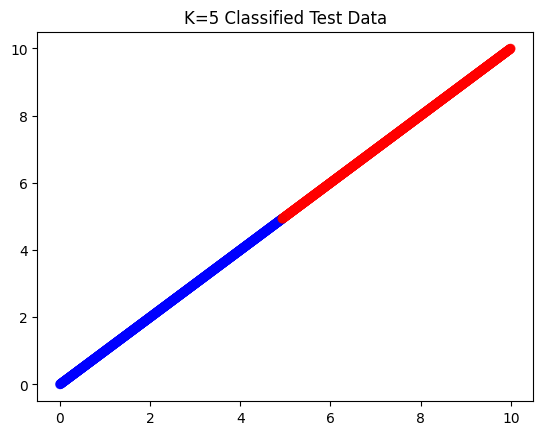

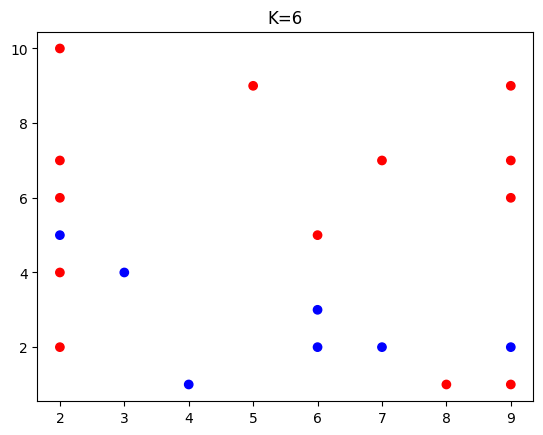

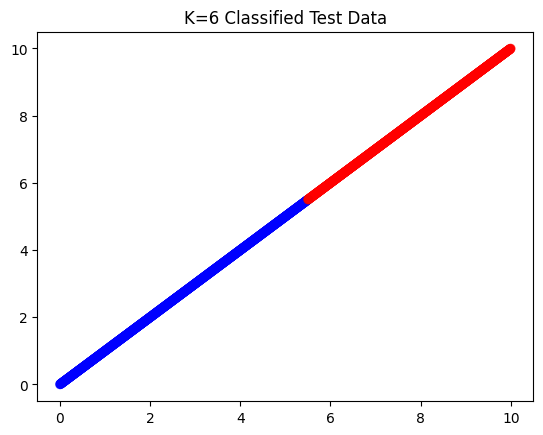

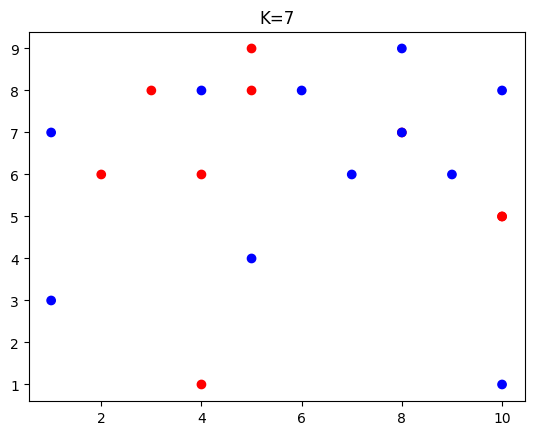

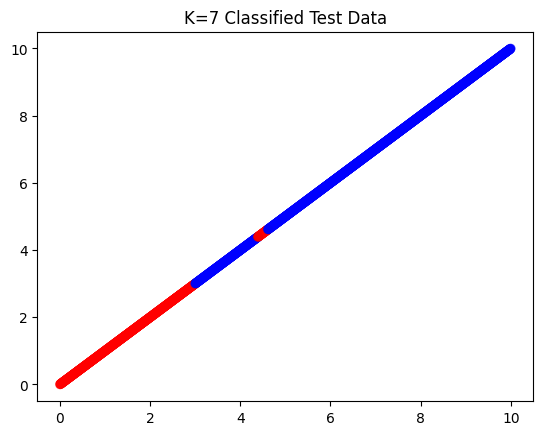

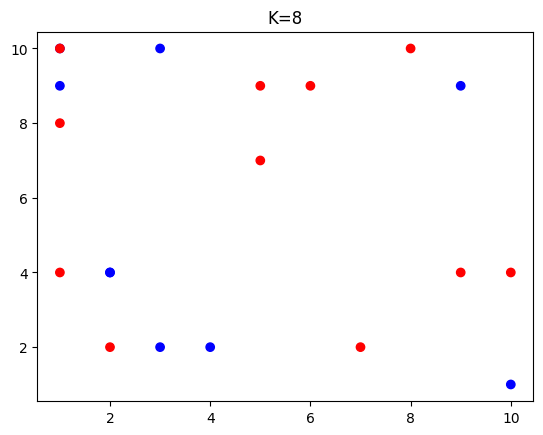

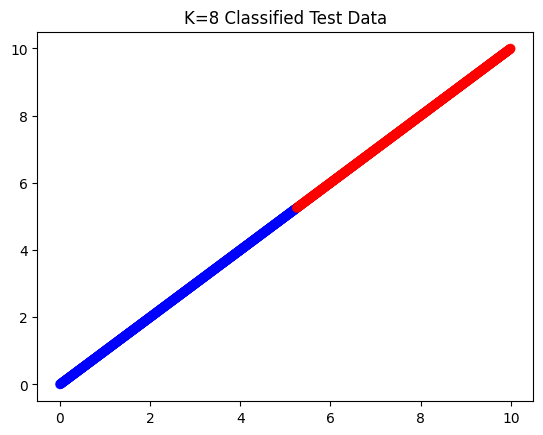

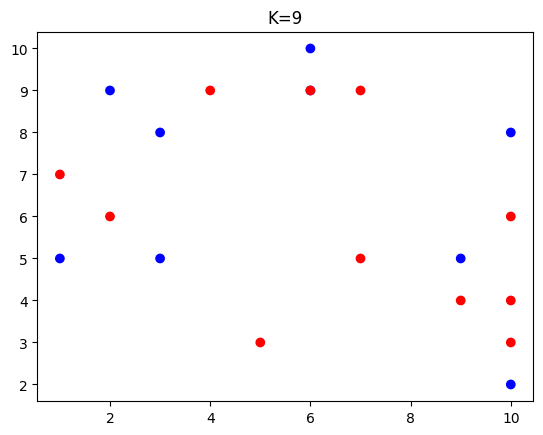

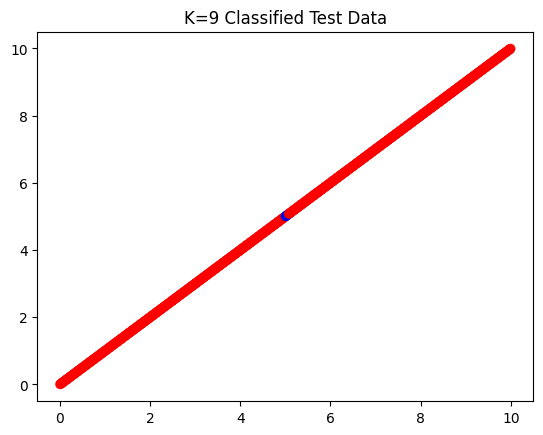

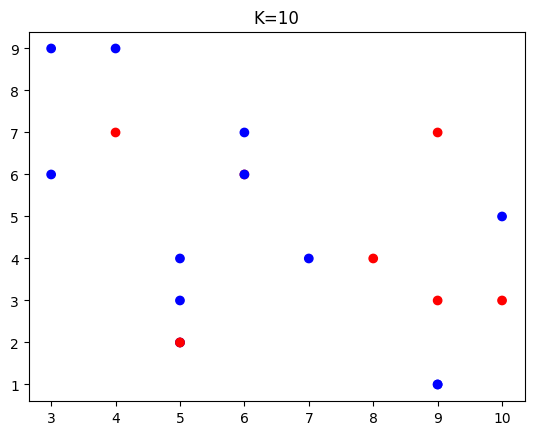

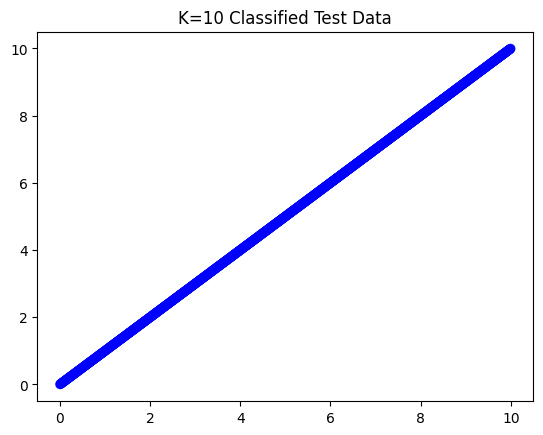

In [3]:
# A5, A6

r = 10

for i in range(1, r + 1):
    train_d_p = {
        "x": generate_rand_samples(20),
        "y": generate_rand_samples(20),
        "class": generate_rand_class(20, ["blue", "red"])
    }

    train_d = pd.DataFrame(train_d_p)
    plt.scatter(train_d["x"], train_d["y"], c=train_d["class"])
    plt.title(f'K={i}')
    plt.show()

    test_d_p = {
        "x": np.linspace(0, 10, 10_000),
        "y": np.linspace(0, 10, 10_000),
    }

    test_d = pd.DataFrame(test_d_p)

    k = i
    m = KNeighborsClassifier(n_neighbors=k)

    X_train = train_d[["x", "y"]]
    y_train = [0 if c == "blue" else 1 for c in train_d["class"]]

    X_test = test_d[["x", "y"]]

    m.fit(X_train, y_train)

    y_test = m.predict(X_test)
    test_d["class"] = ["blue" if c == 0 else "red" for c in y_test]

    plt.scatter(test_d["x"], test_d["y"], c=test_d["class"], alpha=0.1)
    plt.title(f'K={i} Classified Test Data')
    plt.show()

In [4]:
# A7
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

clf_1 = RandomizedSearchCV(model, {
    "n_neighbors": range(1, 11)
})

clf_1.fit(test_data[["x", "y"]], y_test)

clf_1.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [5]:
clf_2 = GridSearchCV(model, {
    "n_neighbors": range(1, 11)
})

clf_2.fit(test_data[["x", "y"]], y_test)

clf_2.best_estimator_

KNeighborsClassifier(n_neighbors=1)